# Готовим LDA по рецептам

Как вы уже знаете, в тематическом моделировании делается предположение о том, что для определения тематики порядок слов в документе не важен; об этом гласит гипотеза «мешка слов». Сегодня мы будем работать с несколько нестандартной для тематического моделирования коллекцией, которую можно назвать «мешком ингредиентов», потому что на состоит из рецептов блюд разных кухонь. Тематические модели ищут слова, которые часто вместе встречаются в документах, и составляют из них темы. Мы попробуем применить эту идею к рецептам и найти кулинарные «темы». Эта коллекция хороша тем, что не требует предобработки. Кроме того, эта задача достаточно наглядно иллюстрирует принцип работы тематических моделей.

### Загрузка данных

Коллекция дана в json-формате: для каждого рецепта известны его id, кухня (cuisine) и список ингредиентов, в него входящих. Загрузить данные можно с помощью модуля json (он входит в дистрибутив Anaconda):

In [1]:
import json

In [2]:
with open("recipes.json") as f:
    recipes = json.load(f)

In [3]:
print recipes[0]

{u'cuisine': u'greek', u'id': 10259, u'ingredients': [u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']}


In [4]:
print(type(recipes[0]))

<type 'dict'>


### Составление корпуса

In [6]:
from gensim import corpora, models
import numpy as np

Наша коллекция небольшая, и целиком помещается в оперативную память. Gensim может работать с такими данными и не требует их сохранения на диск в специальном формате. Для этого коллекция должна быть представлена в виде списка списков, каждый внутренний список соответствует отдельному документу и состоит из его слов. Пример коллекции из двух документов: 

[["hello", "world"], ["programming", "in", "python"]]

Преобразуем наши данные в такой формат, а затем создадим объекты corpus и dictionary, с которыми будет работать модель.

In [7]:
texts = [recipe["ingredients"] for recipe in recipes]
dictionary = corpora.Dictionary(texts)   # составляем словарь
corpus = [dictionary.doc2bow(text) for text in texts]  # составляем корпус документов

In [8]:
print texts[0]
print corpus[0]

[u'romaine lettuce', u'black olives', u'grape tomatoes', u'garlic', u'pepper', u'purple onion', u'seasoning', u'garbanzo beans', u'feta cheese crumbles']
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1)]


У объекта dictionary есть полезная переменная dictionary.token2id, позволяющая находить соответствие между ингредиентами и их индексами.

### Обучение модели
Вам может понадобиться [документация](https://radimrehurek.com/gensim/models/ldamodel.html) LDA в gensim.

__Задание 1.__ Обучите модель LDA с 40 темами, установив количество проходов по коллекции 5 и оставив остальные параметры по умолчанию. 


Затем вызовите метод модели *show_topics*, указав количество тем 40 и количество токенов 10, и сохраните результат (топы ингредиентов в темах) в отдельную переменную. Если при вызове метода *show_topics* указать параметр *formatted=True*, то топы ингредиентов будет удобно выводить на печать, если *formatted=False*, будет удобно работать со списком программно. Выведите топы на печать, рассмотрите темы, а затем ответьте на вопрос:

Сколько раз ингредиенты "salt", "sugar", "water", "mushrooms", "chicken", "eggs" встретились среди топов-10 всех 40 тем? При ответе __не нужно__ учитывать составные ингредиенты, например, "hot water".

Передайте 6 чисел в функцию save_answers1 и загрузите сгенерированный файл в форму.

У gensim нет возможности фиксировать случайное приближение через параметры метода, но библиотека использует numpy для инициализации матриц. Поэтому, по утверждению автора библиотеки, фиксировать случайное приближение нужно командой, которая написана в следующей ячейке. __Перед строкой кода с построением модели обязательно вставляйте указанную строку фиксации random.seed.__

In [9]:
np.random.seed(76543)
%time LDA_model = models.ldamodel.LdaModel(corpus = corpus, id2word = dictionary, num_topics = 40, passes = 5)

CPU times: user 6min 29s, sys: 2.75 s, total: 6min 31s
Wall time: 6min 38s


In [10]:
topics = LDA_model.show_topics(num_topics = 40, num_words = 10, formatted = True)

In [11]:
topics

[(0,
  u'0.089*"cooking spray" + 0.083*"salt" + 0.080*"garlic cloves" + 0.068*"olive oil" + 0.066*"chopped onion" + 0.037*"crushed red pepper" + 0.036*"fat free less sodium chicken broth" + 0.034*"black pepper" + 0.032*"ground black pepper" + 0.032*"water"'),
 (1,
  u'0.085*"carrots" + 0.059*"onions" + 0.057*"sauce" + 0.056*"cabbage" + 0.046*"spinach" + 0.039*"beef" + 0.033*"low sodium chicken broth" + 0.033*"water" + 0.029*"firm tofu" + 0.028*"green cabbage"'),
 (2,
  u'0.066*"cracked black pepper" + 0.059*"dry red wine" + 0.041*"shortening" + 0.041*"beef broth" + 0.040*"vegetable oil cooking spray" + 0.039*"grape tomatoes" + 0.035*"cilantro sprigs" + 0.031*"french bread" + 0.029*"dried rosemary" + 0.029*"all-purpose flour"'),
 (3,
  u'0.133*"potatoes" + 0.124*"oil" + 0.063*"salt" + 0.059*"chickpeas" + 0.042*"onions" + 0.038*"coriander" + 0.034*"pepper" + 0.033*"saffron" + 0.031*"chopped tomatoes" + 0.026*"vegetables"'),
 (4,
  u'0.062*"green bell pepper" + 0.058*"garlic powder" + 0.0

In [13]:
top_word = {'salt': 0,
        'sugar': 0,
        'water': 0,
        'mushrooms': 0,
        'chicken': 0,
        'eggs': 0}

for tema in topics:
    super_dictionary = tema[1].split('"')
    for word in super_dictionary:
        if word == 'salt':
            top_word['salt'] += 1
        elif word == 'sugar':
            top_word['sugar'] += 1
        elif word == 'water':
            top_word['water'] += 1
        elif word == 'mushrooms':
            top_word['mushrooms'] += 1
        elif word == 'chicken':
            top_word['chicken'] += 1
        elif word == 'eggs':
            top_word['eggs'] += 1
            
print top_word.items()

[('mushrooms', 1), ('eggs', 1), ('sugar', 7), ('water', 8), ('chicken', 1), ('salt', 20)]


In [14]:
def save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs):
    with open("cooking_LDA_pa_task1.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs]]))

In [15]:
c_salt = top_word['salt']
c_sugar = top_word['sugar']
c_water = top_word['water']
c_mushrooms = top_word['mushrooms']
c_chicken = top_word['chicken']
c_eggs = top_word['eggs']

save_answers1(c_salt, c_sugar, c_water, c_mushrooms, c_chicken, c_eggs)

### Фильтрация словаря
В топах тем гораздо чаще встречаются первые три рассмотренных ингредиента, чем последние три. При этом наличие в рецепте курицы, яиц и грибов яснее дает понять, что мы будем готовить, чем наличие соли, сахара и воды. Таким образом, даже в рецептах есть слова, часто встречающиеся в текстах и не несущие смысловой нагрузки, и поэтому их не желательно видеть в темах. Наиболее простой прием борьбы с такими фоновыми элементами — фильтрация словаря по частоте. Обычно словарь фильтруют с двух сторон: убирают очень редкие слова (в целях экономии памяти) и очень частые слова (в целях повышения интерпретируемости тем). Мы уберем только частые слова.

In [17]:
import copy
dictionary2 = copy.deepcopy(dictionary)
dictionary3 = copy.deepcopy(dictionary)

__Задание 2.__ У объекта dictionary2 есть переменная *dfs* — это словарь, ключами которого являются id токена, а элементами — число раз, сколько слово встретилось во всей коллекции. Сохраните в отдельный список ингредиенты, которые встретились в коллекции больше 4000 раз. Вызовите метод словаря *filter_tokens*, подав в качестве первого аргумента полученный список популярных ингредиентов. Вычислите две величины: dict_size_before и dict_size_after — размер словаря до и после фильтрации.

Затем, используя новый словарь, создайте новый корпус документов, corpus2, по аналогии с тем, как это сделано в начале ноутбука. Вычислите две величины: corpus_size_before и corpus_size_after — суммарное количество ингредиентов в корпусе (для каждого документа вычислите число различных ингредиентов в нем и просуммируйте по всем документам) до и после фильтрации.

Передайте величины dict_size_before, dict_size_after, corpus_size_before, corpus_size_after в функцию save_answers2 и загрузите сгенерированный файл в форму.

In [18]:
super_dictionary_token = dictionary2.dfs

In [19]:
popular_ingredients = []
for key in super_dictionary_token:
    if super_dictionary_token[key] > 4000:
        popular_ingredients.append(key)

In [20]:
print popular_ingredients

[0, 4, 9, 12, 17, 21, 29, 45, 48, 54, 100, 117]


In [21]:
super_dictionary_token_after = dictionary3.filter_tokens(popular_ingredients)

In [22]:
print dictionary2
print '\n'
print dictionary3

Dictionary(6714 unique tokens: [u'low-sodium fat-free chicken broth', u'sweetened coconut', u'baking chocolate', u'egg roll wrappers', u'bottled low sodium salsa']...)


Dictionary(6702 unique tokens: [u'low-sodium fat-free chicken broth', u'sweetened coconut', u'baking chocolate', u'egg roll wrappers', u'bottled low sodium salsa']...)


In [23]:
dict_size_before = 6714

dict_size_after = 6702

In [24]:
corpus2 = [dictionary3.doc2bow(text) for text in texts]  # составляем корпус документов

In [25]:
corpus_size_before = 0
corpus_size_after = 0

for i in range(len(corpus)):
    corpus_size_before += len(corpus[i])
    
for i in range(len(corpus2)):
    corpus_size_after += len(corpus2[i])

In [26]:
def save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after):
    with open("cooking_LDA_pa_task2.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [dict_size_before, dict_size_after, corpus_size_before, corpus_size_after]]))

In [27]:
save_answers2(dict_size_before, dict_size_after, corpus_size_before, corpus_size_after)

### Сравнение когерентностей
__Задание 3.__ Постройте еще одну модель по корпусу corpus2 и словарю dictionary2, остальные параметры оставьте такими же, как при первом построении модели. Сохраните новую модель в другую переменную (не перезаписывайте предыдущую модель). Не забудьте про фиксирование seed!

Затем воспользуйтесь методом *top_topics* модели, чтобы вычислить ее когерентность. Передайте в качестве аргумента соответствующий модели корпус. Метод вернет список кортежей (топ токенов, когерентность), отсортированных по убыванию последней. Вычислите среднюю по всем темам когерентность для каждой из двух моделей и передайте в функцию save_answers3. 

In [28]:
np.random.seed(76543)
%time LDA_model_three = models.ldamodel.LdaModel(corpus = corpus2, id2word = dictionary2, num_topics = 40, passes = 5)

CPU times: user 5min 43s, sys: 2.13 s, total: 5min 45s
Wall time: 5min 50s


In [30]:
top_tokens_kogerentnost_1 = LDA_model.top_topics(corpus)
top_tokens_kogerentnost_2 = LDA_model_three.top_topics(corpus2)

In [31]:
coherence = 0
coherence2 = 0
for i in range(len(top_tokens_kogerentnost_1)):
    coherence += (top_tokens_kogerentnost_1[i][1]) / (len(top_tokens_kogerentnost_1))
    coherence2 += (top_tokens_kogerentnost_2[i][1]) / (len(top_tokens_kogerentnost_2))

In [32]:
def save_answers3(coherence, coherence2):
    with open("cooking_LDA_pa_task3.txt", "w") as fout:
        fout.write(" ".join(["%3f"%el for el in [coherence, coherence2]]))

In [33]:
save_answers3(coherence, coherence2)

Считается, что когерентность хорошо соотносится с человеческими оценками интерпретируемости тем. Поэтому на больших текстовых коллекциях когерентность обычно повышается, если убрать фоновую лексику. Однако в нашем случае этого не произошло. 

### Изучение влияния гиперпараметра alpha

В этом разделе мы будем работать со второй моделью, то есть той, которая построена по сокращенному корпусу. 

Пока что мы посмотрели только на матрицу темы-слова, теперь давайте посмотрим на матрицу темы-документы. Выведите темы для нулевого (или любого другого) документа из корпуса, воспользовавшись методом *get_document_topics* второй модели:

In [53]:
bow = corpus2[0]
topics = LDA_model_three.get_document_topics(bow)

In [54]:
topics

[(3, 0.628124999999999), (21, 0.1281249999999998), (23, 0.1281249999999998)]

Также выведите содержимое переменной *.alpha* второй модели:

In [55]:
alph = LDA_model_three.alpha
print alph[0]

0.025


У вас должно получиться, что документ характеризуется небольшим числом тем. Попробуем поменять гиперпараметр alpha, задающий априорное распределение Дирихле для распределений тем в документах.

__Задание 4.__ Обучите третью модель: используйте сокращенный корпус (corpus2 и dictionary2) и установите параметр __alpha=1__, passes=5. Не забудьте про фиксацию seed! Выведите темы новой модели для нулевого документа; должно получиться, что распределение над множеством тем практически равномерное. Чтобы убедиться в том, что во второй модели документы описываются гораздо более разреженными распределениями, чем в третьей, посчитайте суммарное количество элементов, __превосходящих 0.01__, в матрицах темы-документы обеих моделей. Другими словами, запросите темы  модели для каждого документа с параметром *minimum_probability=0.01* и просуммируйте число элементов в получаемых массивах. Передайте две суммы (сначала для модели с alpha по умолчанию, затем для модели в alpha=1) в функцию save_answers4.

In [52]:
np.random.seed(76543)
%time LDA_model_four = models.ldamodel.LdaModel(corpus = corpus2, id2word = dictionary2, num_topics = 40, passes = 5, alpha = 1)

CPU times: user 15min 38s, sys: 4.37 s, total: 15min 42s
Wall time: 15min 49s


In [56]:
bow_new = corpus2[0]
topics = LDA_model_four.get_document_topics(bow)

In [63]:
topics

[(0, 0.021277839257091438),
 (1, 0.0212774673062234),
 (2, 0.021347106807850815),
 (3, 0.081907574816906),
 (4, 0.021356758592252747),
 (5, 0.02127666833823671),
 (6, 0.021282718723840098),
 (7, 0.02135216402312965),
 (8, 0.02129786490147947),
 (9, 0.021352985398777447),
 (10, 0.04287766455814259),
 (11, 0.02132748672299583),
 (12, 0.02485503670412019),
 (13, 0.042004222151580776),
 (14, 0.021413296498939225),
 (15, 0.021293211612785534),
 (16, 0.02127661178856046),
 (17, 0.04256778678254317),
 (18, 0.04047927743144199),
 (19, 0.021276843849255423),
 (20, 0.021646643569864902),
 (21, 0.021302723365674694),
 (22, 0.0212890679694442),
 (23, 0.021330066265674984),
 (24, 0.021284779751625755),
 (25, 0.02127659574468085),
 (26, 0.021299416174953047),
 (27, 0.021286663303279947),
 (28, 0.02141167992142519),
 (29, 0.02127659574468085),
 (30, 0.021276595744695273),
 (31, 0.02127659574468085),
 (32, 0.021419567804785985),
 (33, 0.02128930620347274),
 (34, 0.021398849209141143),
 (35, 0.02156089

In [65]:
count_model2_list = []
count_model3_list = []

for i in range(len(corpus2)):
    list_topics_2 = LDA_model_three.get_document_topics(corpus2[i], minimum_probability = 0.01)
    count_model2_list.append(len(list_topics_2))
    
    list_topics_3 = LDA_model_four.get_document_topics(corpus2[i], minimum_probability = 0.01)
    count_model3_list.append(len(list_topics_3))
    
count_model2 = sum(count_model2_list)
count_model3 = sum(count_model3_list)

print(count_model2)
print '\n'
print(count_model3)

202005


1590960


In [66]:
def save_answers4(count_model2, count_model3):
    with open("cooking_LDA_pa_task4.txt", "w") as fout:
        fout.write(" ".join([str(el) for el in [count_model2, count_model3]]))

In [67]:
save_answers4(count_model2, count_model3)

Таким образом, гиперпараметр __alpha__ влияет на разреженность распределений тем в документах. Аналогично гиперпараметр __eta__ влияет на разреженность распределений слов в темах.

### LDA как способ понижения размерности
Иногда, распределения над темами, найденные с помощью LDA, добавляют в матрицу объекты-признаки как дополнительные, семантические, признаки, и это может улучшить качество решения задачи. Для простоты давайте просто обучим классификатор рецептов на кухни на признаках, полученных из LDA, и измерим точность (accuracy).

__Задание 5.__ Используйте модель, построенную по сокращенной выборке с alpha по умолчанию (вторую модель). Составьте матрицу $\Theta = p(t|d)$ вероятностей тем в документах; вы можете использовать тот же метод get_document_topics, а также вектор правильных ответов y (в том же порядке, в котором рецепты идут в переменной recipes). Создайте объект RandomForestClassifier со 100 деревьями, с помощью функции cross_val_score вычислите среднюю accuracy по трем фолдам (перемешивать данные не нужно) и передайте в функцию save_answers5.

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [80]:
matrix = []
for i in range(len(corpus2)):
    list_doc = LDA_model_three.get_document_topics(corpus2[i], minimum_probability = 0)
    line = []
    for j in list_doc:
        line.append(j[1])
    matrix.append(line)  

In [107]:
cuisine_names = []
for current_recipe_dict in recipes:
    cuisine_names.append(current_recipe_dict['cuisine'])

random_forest_classifier = RandomForestClassifier(n_estimators = 100, random_state=0)
cross_validation_scores = cross_val_score(estimator = random_forest_classifier, X = matrix, y = cuisine_names)

In [108]:
accuracy_mean_score = np.mean(cross_validation_scores)

In [109]:
accuracy_mean_score

0.5507128630436421

In [110]:
def save_answers5(accuracy):
     with open("cooking_LDA_pa_task5.txt", "w") as fout:
        fout.write(str(accuracy))

In [111]:
save_answers5(accuracy_mean_score)

Для такого большого количества классов это неплохая точность. Вы можете попроовать обучать RandomForest на исходной матрице частот слов, имеющей значительно большую размерность, и увидеть, что accuracy увеличивается на 10–15%. Таким образом, LDA собрал не всю, но достаточно большую часть информации из выборки, в матрице низкого ранга.

### LDA — вероятностная модель
Матричное разложение, использующееся в LDA, интерпретируется как следующий процесс генерации документов.

Для документа $d$ длины $n_d$:
1. Из априорного распределения Дирихле с параметром alpha сгенерировать распределение над множеством тем: $\theta_d \sim Dirichlet(\alpha)$
1. Для каждого слова $w = 1, \dots, n_d$:
    1. Сгенерировать тему из дискретного распределения $t \sim \theta_{d}$
    1. Сгенерировать слово из дискретного распределения $w \sim \phi_{t}$.
    
Подробнее об этом в [Википедии](https://en.wikipedia.org/wiki/Latent_Dirichlet_allocation).

В контексте нашей задачи получается, что, используя данный генеративный процесс, можно создавать новые рецепты. Вы можете передать в функцию модель и число ингредиентов и сгенерировать рецепт :)

In [112]:
def generate_recipe(model, num_ingredients):
    theta = np.random.dirichlet(model.alpha)
    for i in range(num_ingredients):
        t = np.random.choice(np.arange(model.num_topics), p=theta)
        topic = model.show_topic(t, topn=model.num_terms)
        topic_distr = [x[1] for x in topic]
        terms = [x[0] for x in topic]
        w = np.random.choice(terms, p=topic_distr)
        print w

In [113]:
generate_recipe(LDA_model_three, 5)

apple schnapps
smoked mozzarella
pink lady apple
mustard powder
boneless pork shoulder roast


### Интерпретация построенной модели
Вы можете рассмотреть топы ингредиентов каждой темы. Большиснтво тем сами по себе похожи на рецепты; в некоторых собираются продукты одного вида, например, свежие фрукты или разные виды сыра.

Попробуем эмпирически соотнести наши темы с национальными кухнями (cuisine). Построим матрицу $A$ размера темы $x$ кухни, ее элементы $a_{tc}$ — суммы $p(t|d)$ по всем документам $d$, которые отнесены к кухне $c$. Нормируем матрицу на частоты рецептов по разным кухням, чтобы избежать дисбаланса между кухнями. Следующая функция получает на вход объект модели, объект корпуса и исходные данные и возвращает нормированную матрицу $A$. Ее удобно визуализировать с помощью seaborn.

In [114]:
import pandas
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

In [115]:
def compute_topic_cuisine_matrix(model, corpus, recipes):
    # составляем вектор целевых признаков
    targets = list(set([recipe["cuisine"] for recipe in recipes]))
    # составляем матрицу
    tc_matrix = pandas.DataFrame(data=np.zeros((model.num_topics, len(targets))), columns=targets)
    for recipe, bow in zip(recipes, corpus):
        recipe_topic = model.get_document_topics(bow)
        for t, prob in recipe_topic:
            tc_matrix[recipe["cuisine"]][t] += prob
    # нормируем матрицу
    target_sums = pandas.DataFrame(data=np.zeros((1, len(targets))), columns=targets)
    for recipe in recipes:
        target_sums[recipe["cuisine"]] += 1
    return pandas.DataFrame(tc_matrix.values/target_sums.values, columns=tc_matrix.columns)

In [116]:
def plot_matrix(tc_matrix):
    plt.figure(figsize=(10, 10))
    seaborn.heatmap(tc_matrix, square=True)

In [117]:
# Визуализируйте матрицу
compute_topic_cuisine_matrix(LDA_model_three, corpus2, recipes)

,irish,mexican,chinese,filipino,vietnamese,moroccan,brazilian,japanese,british,greek,indian,jamaican,french,spanish,russian,cajun_creole,thai,southern_us,korean,italian
0,0.025448,0.008334,0.008180,0.006170,0.006791,0.049832,0.018264,0.006828,0.032601,0.016801,0.014063,0.061866,0.018376,0.011081,0.016964,0.010803,0.006369,0.032793,0.003122,0.009160
1,0.111878,0.017568,0.019534,0.019225,0.011790,0.018052,0.037629,0.021579,0.129450,0.026640,0.022585,0.038591,0.114296,0.041551,0.107501,0.037038,0.006985,0.139057,0.009753,0.049026
2,0.006251,0.208524,0.009038,0.013848,0.042349,0.036899,0.084946,0.010350,0.004487,0.010098,0.039604,0.047635,0.004532,0.034329,0.007760,0.011087,0.058176,0.013594,0.007609,0.005517
3,0.009648,0.024229,0.008802,0.015338,0.014330,0.021617,0.015020,0.015853,0.012728,0.115305,0.015151,0.010058,0.018812,0.026813,0.026873,0.016543,0.009145,0.009808,0.012522,0.018805
4,0.010729,0.013911,0.006423,0.004578,0.005844,0.005571,0.005489,0.002901,0.010802,0.029421,0.004930,0.009326,0.013900,0.014011,0.007882,0.016281,0.009939,0.013073,0.001995,0.035067
5,0.125122,0.019847,0.016851,0.068740,0.010088,0.025456,0.051926,0.029466,0.151491,0.032662,0.021200,0.051310,0.061180,0.040128,0.089590,0.026814,0.007496,0.092304,0.009270,0.032383
6,0.016957,0.032105,0.010478,0.017728,0.008581,0.041518,0.022500,0.007592,0.018295,0.043885,0.020753,0.055715,0.019820,0.038414,0.018677,0.101775,0.009546,0.034328,0.008022,0.050595
7,0.007073,0.007311,0.029846,0.024248,0.014892,0.004372,0.025630,0.013561,0.016510,0.003795,0.002469,0.014648,0.011856,0.011022,0.017565,0.008488,0.008065,0.013702,0.015687,0.007649
8,0.010152,0.009962,0.066339,0.093774,0.036387,0.006530,0.026005,0.023066,0.012439,0.004776,0.014769,0.034148,0.009337,0.010706,0.017101,0.010014,0.027820,0.014790,0.020482,0.005766
9,0.024391,0.007183,0.031187,0.033761,0.053149,0.009427,0.019303,0.019249,0.013903,0.004789,0.009658,0.015599,0.009760,0.008024,0.012395,0.009302,0.040457,0.014970,0.030717,0.007413


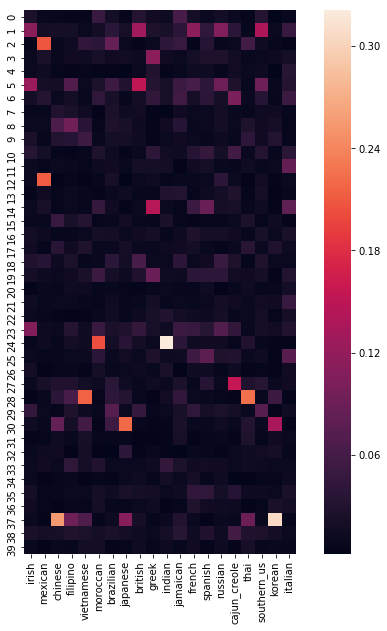

In [118]:
plot_matrix(compute_topic_cuisine_matrix(LDA_model_three, corpus2, recipes))

Чем темнее квадрат в матрице, тем больше связь этой темы с данной кухней. Мы видим, что у нас есть темы, которые связаны с несколькими кухнями. Такие темы показывают набор ингредиентов, которые популярны в кухнях нескольких народов, то есть указывают на схожесть кухонь этих народов. Некоторые темы распределены по всем кухням равномерно, они показывают наборы продуктов, которые часто используются в кулинарии всех стран. 

Жаль, что в датасете нет названий рецептов, иначе темы было бы проще интерпретировать...